In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls
%cd gdrive/My Drive/final-project/collab

gdrive	sample_data
/content/gdrive/My Drive/final-project/collab


In [3]:
!pip install transformers

     |████████████████████████████████| 1.3MB 13.2MB/s 
     |████████████████████████████████| 2.9MB 57.7MB/s 
     |████████████████████████████████| 1.1MB 54.8MB/s 
     |████████████████████████████████| 890kB 53.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=77b20db91d1df70a522ecef9b149ce047547495706c10844c83f44a09226edec
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [4]:
!python train.py --data ./dataset.csv --maxlen 512 --batch 36 --rate 2e-5 --epochs 4

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
2020-10-29 02:05:19.085976: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
GPU device: Tesla T4
Number of training rows: 94,471

legit    0.554879
spam     0.445121
Name: tag, dtype: float64

Drop 680 row with null value

Number of remain rows: 93,791

Clean data        ... Elapsed time: 131.962


Load model        ...
Downloading: 100% 433/433 [00:00<00:00, 632kB/s]
Downloading: 100% 440M/440M [00:05<00:00, 86.3MB/s]
Downloading: 100% 232k/232k [00:00<00:00, 15.6MB/s]
Downloading: 100% 466k/466k [00:00<00:00, 12.8MB/s]
Elapsed time: 8.043
Split data        ... Elapsed time: 0.056
Tokenize          ... Elapsed time: 45.391
Seq to Tensor     ... Elapsed time: 4.140
Create DataLoader ... Elapsed time: 0.0

In [5]:
import torch
import preprocess as pproc
import dataprocess as dproc
import torch.nn as nn
from timeit import default_timer as timer
import argparse

from predmodel import predict, show_preds

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
test_dataloader = torch.load('saved_test_loader.pt')
test_y = torch.load('saved_test_label.pt')

In [7]:
device = torch.device("cuda")

In [8]:
bert, tokenizer = dproc.load_pretrained()
model = dproc.BERT_Arch(bert)
model = model.to(device)

Load model        ...
Elapsed time: 14.573


In [9]:
model.load_state_dict(torch.load('saved_weights.pt'))

<All keys matched successfully>

In [10]:
total_preds = predict(device, model, test_dataloader)


Predicting...
  Batch    50  of    391.  Time: 58.24260
  Batch   100  of    391.  Time: 65.50241
  Batch   150  of    391.  Time: 68.28836
  Batch   200  of    391.  Time: 68.17586
  Batch   250  of    391.  Time: 67.80444
  Batch   300  of    391.  Time: 67.95029
  Batch   350  of    391.  Time: 67.90501
Predict time: 519.17525


In [11]:
import numpy as np
np.save('pred', total_preds)

In [ ]:
import numpy as np
total_preds = np.load('pred.npy')

Accuray: 90.213%
ROC-AUC: 89.723%


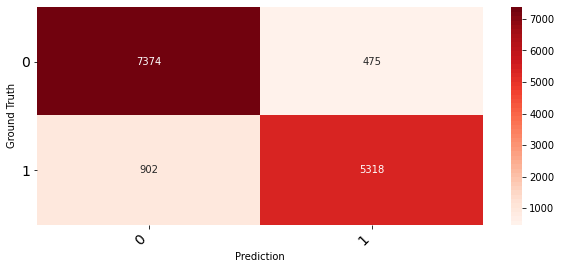

In [12]:
from predmodel import show_preds
preds = show_preds(total_preds, test_y)